In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spambase/spambase_csv.csv


In [2]:
path = '../input/spambase/spambase_csv.csv'

In [3]:
df = pd.read_csv(path)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,57].values
print(X)

[[0.000e+00 6.400e-01 6.400e-01 ... 3.756e+00 6.100e+01 2.780e+02]
 [2.100e-01 2.800e-01 5.000e-01 ... 5.114e+00 1.010e+02 1.028e+03]
 [6.000e-02 0.000e+00 7.100e-01 ... 9.821e+00 4.850e+02 2.259e+03]
 ...
 [3.000e-01 0.000e+00 3.000e-01 ... 1.404e+00 6.000e+00 1.180e+02]
 [9.600e-01 0.000e+00 0.000e+00 ... 1.147e+00 5.000e+00 7.800e+01]
 [0.000e+00 0.000e+00 6.500e-01 ... 1.250e+00 5.000e+00 4.000e+01]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

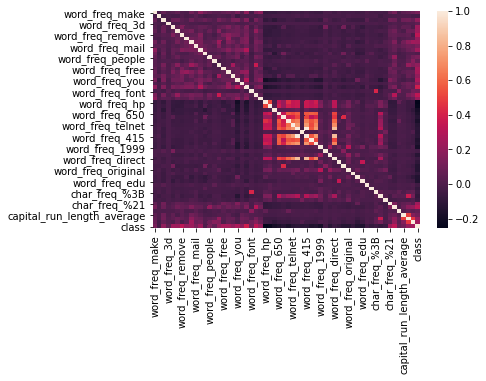

In [6]:
sns.heatmap(df.corr())

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [9]:
pred = logreg.predict(x_test)

In [10]:
score = logreg.score(x_test,y_test)
print(score)

0.9150141643059491


Text(0.5, 1.0, 'accuracy score : 0.9150141643059491')

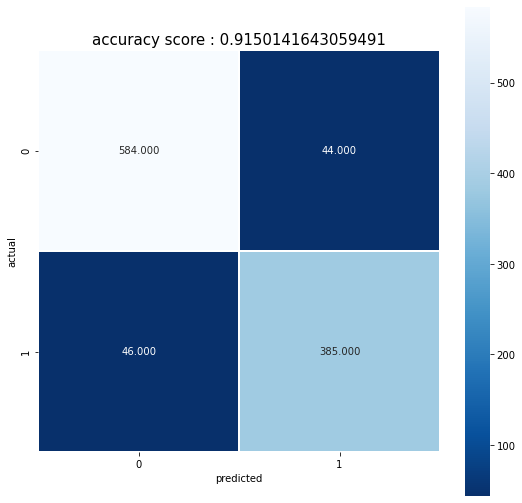

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths= .5, square = True, cmap = 'Blues_r')
plt.ylabel('actual')
plt.xlabel('predicted')
all_sample_title = 'accuracy score : {0}'. format(score)
plt.title(all_sample_title, size  = 15)

In [12]:
print(pred)

[1 0 0 ... 1 1 1]


In [13]:
my_submission = pd.DataFrame({'chance': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [14]:
my_submission

,chance
0,1
1,0
2,0
3,1
4,1
...,...
1054,0
1055,0
1056,1
1057,1
